Ce notebook montre une implémentation de la méthode des K-Means sur le dataset Iris sans recourir aux modules classiques dédiés au machine learning. \
On utilise à la place le module __clust.py__ qui contient une classe __KMeans__ adaptée au clustering de données bi-dimensionnelles que nous avons créée suivant les principes de la POO en Python. \
Cette classe propose :
- une méthode _fit()_ qui permet d'identifier un nombre défini de groupes parmi les observations ;
- une méthode _predict()_ qui associe une nouvelle observation à l'un des groupes ;
- une méthode _score()_ qui calcule le taux d'erreur par classe grâce aux vraies étiquettes si elles sont disponibles ;
- un attributs _B_ fournissant les coordonnées de barycentres finaux ;
- un attribut _classes_ donnant l'indice du cluster associé à chaque point de l'ensemble d'apprentissage ;
- un attribut _Xerr_ contenant les points mal classés.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode
np.random.seed(42)

## Chargement et préparation des données Iris

In [26]:
from sklearn.datasets import load_iris

In [27]:
iris = load_iris()
X = iris.data
var = iris.feature_names
var

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Observations

In [28]:
X = X[:, :2]
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

### Etiquettes (vraies classes)

In [29]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Visualisation des observations selon leurs classes

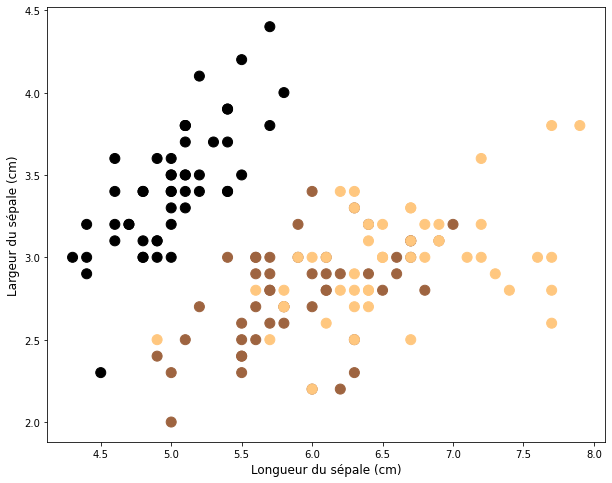

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=y, cmap='copper', s=100)
plt.xlabel('Longueur du sépale (cm)', size=12)
plt.ylabel('Largeur du sépale (cm)', size=12)
plt.show()

## Clustering par la méthode des K-Means

In [32]:
from clust import *

On initialise un objet _KMeans_ chargé de découper un ensemble d'observations de deux variables en trois classes.
La méthode fit() exécute l'algorithme des K-Means à partir de l'ensemble de points donnés en paramètres et attribue une classe 0, 1 ou 2 à chacun d'eux.

In [33]:
test = KMeans(B=3)
test.fit(X)
test.classes

Estimateur créé


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int64)


La méthode score() prend pour argument un array contenant la vraie classe de chaque observation contenue X ; elle le compare ensuite aux classes construites via l'algorithme des K-Means et fournit pour chaque vraie classe le taux d'erreurs de classification.

Notre version des K-Means appliquée à des observations d'iris caractérisées par deux variables recrée ici sans erreur un cluster correspondant à la classe 0 (variété _Setosa_). Distinguer les variétés _Versicolor_ et _Virginica_ par cette méthode s'avère néanmoins plus compliqué puisque le taux d'erreur pour ces deux classes se situe entre 25 et 30%.

In [34]:
test.score(y)

{'Vraie classe 0': 0.0,
 'Vraie classe 2': 0.2553191489361702,
 'Vraie classe 1': 0.2830188679245283,
 'moyenne': 0.17944600562023283}

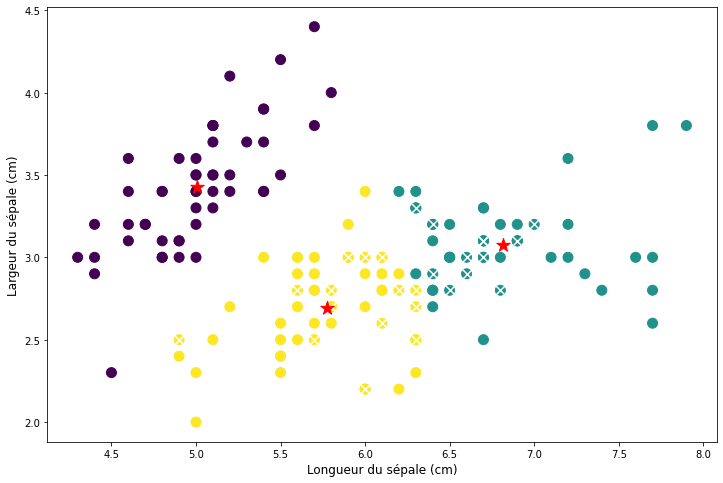

In [35]:
y_pred = [test.predict(p) for p in X]
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='viridis', s=100)
plt.scatter([e[0] for e in test.Xerr], [e[1] for e in test.Xerr], marker='x', c='white', s=200)
plt.scatter([b[0] for b in test.B], [b[1] for b in test.B], marker='*', c='red', s=200)
plt.xlabel('Longueur du sépale (cm)', size=12)
plt.ylabel('Largeur du sépale (cm)', size=12)
plt.show()

Le nuage de points ci-dessus résume les résultats obtenus :
- les observations sont divisées en trois clusters distingués par couleur ;
- les points mal classés sont marqués d'une croix blanche ;
- les barycentres calculés par l'algorithme sont identifiés par une étoile rouge.

## Evaluation du score en fonction de la position initiale des barycentres

In [36]:
n_sim=1000
scores = np.zeros(n_sim)
for i in range(n_sim):
    test = KMeans(B=3, afficher=False)
    test.fit(X)
    scores[i] = test.score(y)['moyenne']

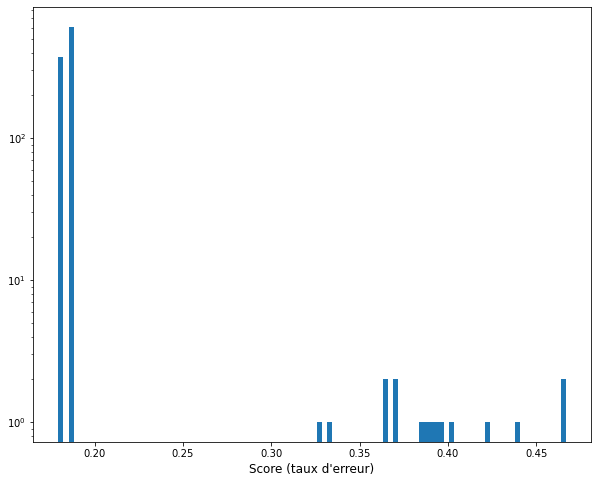

In [37]:
plt.figure(figsize=(10,8))
plt.hist(scores, bins=100, log=True) 
plt.xlabel("Score (taux d'erreur)", size=12)
plt.show()

L'histogramme ci-dessus résume les scores obtenus au terme de 1000 simulations en faisant varier la position des centroïdes initiaux. Par souci de lisibilité, on a pris soin d'appliquer une échelle logarithmique sur l'axe des effectifs.

On constate que dans l'écrasante majorité des cas l'exécution de _KMeans_ fournit un score autour de 18-19% d'erreurs de classification. A quelques rares occasions cependant, le clustering aboutit à un score nettement supérieur.

In [38]:
print(f"Score minimal (meilleure prédiction) : {round(np.min(scores)*100, 2)} % d'erreurs\nScore maximal {round(np.max(scores)*100, 2)} %\nScore moyen = {round(np.mean(scores)*100, 2)} %\nEcart-type = {round(np.std(scores)*100, 2)} %")

Score minimal (meilleure prédiction) : 17.94 % d'erreurs
Score maximal 46.66 %
Score moyen = 18.8 %
Ecart-type = 2.69 %
